In [1]:
clean_up=True # removes gams-related files in work-folder if true
%run StdPackages.ipynb
os.chdir(directory['py'])
os.chdir(directory['curr'])
from matplotlib.ticker import NullFormatter
from cycler import cycler
import warnings
import seaborn as sns
sns.set_theme()

In [2]:
if False:
    catalog = "main_catalog"
    currapp = False #is only for ID though
    %run A3_jonathan.ipynb


16.0
{'Modelstat': 16.0, 'Solvestat': 1.0}
{'Modelstat': 16.0, 'Solvestat': 1.0}
{'Modelstat': 5.0, 'Solvestat': 1.0}
The file_gams_py_gdb0.gdx is still active and was not deleted.
The file_gams_py_gdb2.gdx is still active and was not deleted.
The file_gams_py_gdb3.gdx is still active and was not deleted.
The file_gams_py_gdb5.gdx is still active and was not deleted.
The file_gams_py_gdb7.gdx is still active and was not deleted.
{'Modelstat': 16.0, 'Solvestat': 1.0}


C:\Users\zgr679\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [2]:
if True:
    catalog = "main_catalog"
    currapp = True #is only for ID though
    %run A3_jonathan.ipynb

16.0
{'Modelstat': 16.0, 'Solvestat': 1.0}
{'Modelstat': 2.0, 'Solvestat': 1.0}
{'Modelstat': 2.0, 'Solvestat': 1.0}
The file_gams_py_gdb0.gdx is still active and was not deleted.
The file_gams_py_gdb2.gdx is still active and was not deleted.
The file_gams_py_gdb3.gdx is still active and was not deleted.
The file_gams_py_gdb5.gdx is still active and was not deleted.
The file_gams_py_gdb7.gdx is still active and was not deleted.
{'Modelstat': 16.0, 'Solvestat': 1.0}


In [3]:
if False:
    catalog = "categoryexperiment_EOP"
    currapp = False
    %run A3_jonathan.ipynb
    catalog = "categoryexperiment_ID"
    currapp = False
    %run A3_jonathan.ipynb
    catalog = "categoryexperiment"

In [4]:
# colors = "#1f77b4 #ff770e #2ca02c #d62728".split()
# plt.rcParams.update({"axes.prop_cycle":cycler(color=colors)})

## A rising price of emissions
We present graphically what happens when the emission price gradually increases (static model solution for each price).

In [3]:
x_var = "pM"
if currapp:
    currapp_string = "_currapp"
else:
    currapp_string = ""
if catalog == "main_catalog":
    with (open(x_var + "_" + catalog + ".pkl", "rb")) as f:
        df = pickle.load(f)
elif catalog == "categoryexperiment":
    df = {}
    with open(x_var + "_" + "categoryexperiment_ID" + ".pkl", "rb") as f:
        df["ID"] = pickle.load(f)
    with open(x_var + "_" + "categoryexperiment_EOP" + ".pkl", "rb") as f:
        df["EOP"] = pickle.load(f)

In [4]:
#Calculate abated emissions
if catalog in ["main_catalog", "categoryexperiment_EOP"]:
    df["M0-M"] = df["M0"].iloc[0] - df["M"]
elif catalog in ["categoryexperiment_ID"]:
    df["M0-M"] = df["M0"].iloc[0] - df["M0"]
elif catalog in ["categoryexperiment"]:
    df["EOP"]["M0-M"] = df["EOP"]["M0"].iloc[0] - df["EOP"]["M"]
    df["ID"]["M0-M"] = df["ID"]["M0"].iloc[0] - df["ID"]["M0"]

In [5]:
def translate(col):    
    translate = {
        "M0":"Emissions",
        "pM":"Price of emissions",
        "PwThat_basetech_EH_oil":"Effective oil price",
        "PwThat_basetech_EH_oil_linear":"Oil price without end-of-pipe",
        "qD_basetech_EH_oil":"Oil use",
        "qD_basetech_EH_electricity":"Electricity use",
        "qD_U0_ID_C_EH_2":"Baseline technology",
        "qD_U_ID_t2_1":"Clean technology",
        "qD_U_ID_t1_2":"Semi-clean technology",
        "qD_EH":"Energy service",
        "qD_Y":"Y composite",
        "M0_CO2":"CO2 Emissions",
        "M0-M":"Abated emissions",
        "PwThat_U_ID_t1_2":"Semi-clean technology", 
        "PwThat_U0_ID_C_EH_2":"Baseline technology", 
        "PwThat_U_ID_t2_1":"Clean technology", 
        "PwThat_C_EH_2":"Component with overlap",
        "qD_C_EH_2":"Component with overlap",
        "qD_oil":"Total oil use",
        "qD_U_ID_t1_1":"Input-displacing technology"
    }
    if col in translate:
        return translate[col]
    else:
        return col

def format_double_axes(ax, ax2, x_label="", y_label="", hide_ticks=True):
    ax.set_xlabel(x_label, fontsize=9)
    ax.set_ylabel(y_label, fontsize=9, rotation=90)
#     ax.yaxis.set_label_coords(0.1,1.02)
    if hide_ticks:
        ax.get_xaxis().set_ticks([])
#         ax2.get_yaxis().set_ticks([])
#         ax.get_yaxis().set_ticks([])
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)
    ax.spines["left"].set_linewidth(1)
    ax.spines["left"].set_edgecolor("k")
    ax.spines["bottom"].set_edgecolor("k")
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax2.grid(False)
    #ax.set_axisbelow(True)
    if hide_ticks:
        ax.tick_params(labelleft=False)
        ax2.tick_params(labelright=False)
        ax.tick_params(axis='y', colors='white')
        ax2.tick_params(axis='y', colors='white')
    ax.grid(axis='y', color="lightgrey", linewidth=1)
        
#         ax.get_yaxis().set_major_formatter(NullFormatter())

def format_single_axis(axes, x_label="", y_label="", hide_ticks=True):
    axes.set_xlabel(x_label, fontsize=9)
    axes.set_ylabel(y_label, fontsize=9, rotation=90)
#     axes.yaxis.set_label_coords(0.1,1.02)
    if hide_ticks:
        axes.get_xaxis().set_ticks([])
#         axes.get_yaxis().set_ticks([])
    axes.spines["left"].set_visible(True)
    axes.spines["bottom"].set_visible(True)
    axes.spines["left"].set_linewidth(1)
    axes.spines["left"].set_edgecolor("k")
    axes.spines["bottom"].set_edgecolor("k")
    axes.spines["bottom"].set_linewidth(1)
    axes.spines["right"].set_visible(False)
    axes.spines["top"].set_visible(False)
    if hide_ticks:
        axes.tick_params(labelleft=False)
#         axes.get_xaxis().set_major_formatter(NullFormatter())
    #axes.set_axisbelow(True)
    axes.grid(axis='y', color="lightgrey", linewidth=1)
    

In [6]:
if catalog == "main_catalog":
    if currapp:
        vlines = (df[["PwThat_U_EOP_t1_1", "PwThat_U_EOP_t2_1"]].mean() - pd.Series([df["muG_C_CO2_1"].mean(), df["muG_C_CO2_2"].mean()], index=df[["PwThat_U_EOP_t1_1", "PwThat_U_EOP_t2_1"]].columns)).to_list()
    else:
        try:
            vlines = df[["PwThat_U_EOP_t1_1", "PwThat_U_EOP_t2_1"]].mean().to_list()
        except:
            vlines = df[["PwThat_U_ID_t1_2", "PwThat_U_ID_t2_1"]].mean().to_list()
elif catalog == "categoryexperiment_EOP":
    vlines = df[["PwThat_U_EOP_t1_1"]].mean().to_list()
elif catalog == "categoryexperiment_ID":
    vlines = df[["PwThat_U_ID_t1_1"]].mean().to_list()
elif catalog == "categoryexperiment":
    vlines = df["EOP"][["PwThat_U_EOP_t1_1"]].mean().to_list()

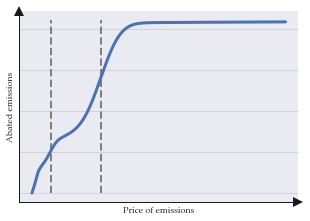

In [7]:
if catalog in ["main_catalog", "categoryexperiment_ID", "categoryexperiment_EOP"]:
    #Emission figure
    fig = plt.figure(figsize=(5, 3.5))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    col = "M0-M"
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") #Otherwise throws warning if the column is named "M"
        #ax.plot(df.index, col, color=colors[0], data=df, label=translate(col), linewidth=4)
        ax.plot(df.index, df["M0-M"], label=translate(col), linewidth=3)

    ax.vlines(x=vlines, ymin=df[col].min()*0.99, ymax=df[col].max()*1.01, ls='--', color="grey", lw=2)
    format_single_axis(ax, x_label=translate(df.index.name), y_label=translate(col))
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=10)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=10)
    fig.savefig("AbatedEmissions_" + catalog + currapp_string + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    del fig, ax

In [8]:
if catalog == "categoryexperiment":
    #Emission figure
    fig = plt.figure(figsize=(2.95, 2.2))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    col = "M0-M"
    ls = {"ID":"-", "EOP":"--"}
    for i, module in enumerate(["ID", "EOP"]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore") #Otherwise throws warning if the column is named "M"
            #ax.plot(df.index, col, color=colors[0], data=df, label=translate(col), linewidth=4)
            ax.plot(df[module].index, df[module]["M0-M"], color=colors[i], label=translate(col) + ", " + module, linewidth=2, ls=ls[module])

    ax.vlines(x=vlines, ymin=df["ID"][col].min(), ymax=df["ID"][col].max(), ls='--', color="grey", lw=1, label="Unit cost")
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.15), frameon=True, handletextpad=0.4, handlelength=1.9, columnspacing=1)

    format_single_axis(ax, x_label=translate(df["ID"].index.name), y_label=translate(col))
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=5)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=5)
    fig.savefig("AbatedEmissions_" + catalog + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    del fig, ax

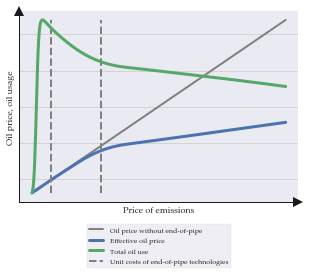

In [9]:
if catalog in ["main_catalog", "categoryexperiment_ID", "categoryexperiment_EOP"]:
    col = "PwThat_basetech_EH_oil"
    slope = df[col].iloc[0:2].reset_index().diff().iloc[1, 1] / df[col].iloc[0:2].reset_index().diff().iloc[1, 0]
    df[col + "_linear"] = pd.Series(((pd.Series(df[col].index) - df.index[0]) * (df[col].iloc[0:2].reset_index().diff().iloc[1, 1] / df[col].iloc[0:2].reset_index().diff().iloc[1, 0]) + df[col].iloc[0]).values, index=df.index)
    #Figure with oil price and oil usage
    fig = plt.figure(figsize=(5, 3.5))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    col = "PwThat_basetech_EH_oil"
    assert col in df.columns
    df[col + "_linear"] = pd.Series(((pd.Series(df[col].index) - df.index[0]) * (df[col].iloc[0:2].reset_index().diff().iloc[1, 1] / df[col].iloc[0:2].reset_index().diff().iloc[1, 0]) + df[col].iloc[0]).values, index=df.index)
    ax.plot(df.index, col + "_linear", data=df, label=translate(col + "_linear"), linewidth=2, color="grey")
    ax.plot(df.index, col, data=df, label=translate(col), linewidth=3, color=colors[0])
    ax2 = ax.twinx()
    col = "qD_oil"
    ax2.plot(df.index, col, data=df, label=translate(col), linewidth=3, color=colors[1])
    ax2.vlines(x=vlines, ymin=df[col].min(), ymax=df[col].max(), ls='--', color="grey", lw=2, label="Unit costs of end-of-pipe technologies")
    lines, labels = ax.get_legend_handles_labels()
    lines = lines + ax2.get_legend_handles_labels()[0]
    labels = labels + ax2.get_legend_handles_labels()[1]
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.1), frameon=True, handletextpad=1, handlelength=1.9, columnspacing=1)
    format_double_axes(ax, ax2, "Price of emissions", "Oil price, oil usage")
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=10)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=10)
    fig.savefig("oil_" + catalog + currapp_string + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    del fig, ax, ax2

In [10]:
if catalog in ["categoryexperiment"]:
    fig = plt.figure(figsize=(2.95, 2.2))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    col = "PwThat_basetech_EH_oil"
    ls = {"ID":"-", "EOP":"--"}
    for i, module in enumerate(["ID", "EOP"]):
        assert col in df[module].columns
        ax.plot(df[module].index, col, data=df[module], label=translate(col) + ", " + module, linewidth=2, ls=ls[module])
    ax2 = ax.twinx()
    col = "qD_oil"
    for i, module in enumerate(["ID", "EOP"]):
        ax2.plot(df[module].index, col, data=df[module], label=translate(col) + ", " + module, linewidth=2, ls=ls[module])

    ax2.vlines(x=vlines, ymin=df["ID"][col].min(), ymax=df["ID"][col].max(), ls='--', color="grey", lw=1, label="Unit cost")
    lines, labels = ax.get_legend_handles_labels()
    lines = lines + ax2.get_legend_handles_labels()[0]
    labels = labels + ax2.get_legend_handles_labels()[1]
    lines[0]._sizes = [30]
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.15), frameon=True, ncol=2, handletextpad=0.4, handlelength=1.9, columnspacing=1)
#     ax.legend().legendHandles[0]._sizes = [1]
#     ax.legend().legendHandles[1]._sizes = [1]
    format_double_axes(ax, ax2, "Price of emissions", "Oil price, oil usage")
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=5)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=5)
    fig.savefig("oil_" + catalog + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    del fig, ax, ax2


Figure showing quantities in the MNL nest where the technology and the baseline compete

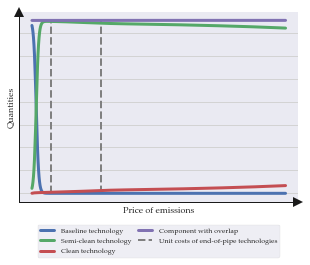

In [11]:
if catalog == "main_catalog":
    fig = plt.figure(figsize=(5, 3.5))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]

    for i, col in enumerate(["qD_U0_ID_C_EH_2", "qD_U_ID_t1_2", "qD_U_ID_t2_1", "qD_C_EH_2"]):
        assert col in df.columns
        ax.plot(df.index, col, data=df, label=translate(col), linewidth=3)
    ax.vlines(x=vlines, ymin=0, ymax=ax.get_ylim()[1]*0.95, ls='--', color="grey", lw=2, label="Unit costs of end-of-pipe technologies")
    lines, labels = ax.get_legend_handles_labels()
    # lines = lines + ax2.get_legend_handles_labels()[0]
    # labels = labels + ax2.get_legend_handles_labels()[1]
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.1), frameon=True, ncol=2, handletextpad=1, handlelength=1.9, columnspacing=1)
    format_single_axis(ax, "Price of emissions", "Quantities")
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=10)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=10)
    fig.savefig("U_overlap_" + catalog + currapp_string +".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    del fig, ax

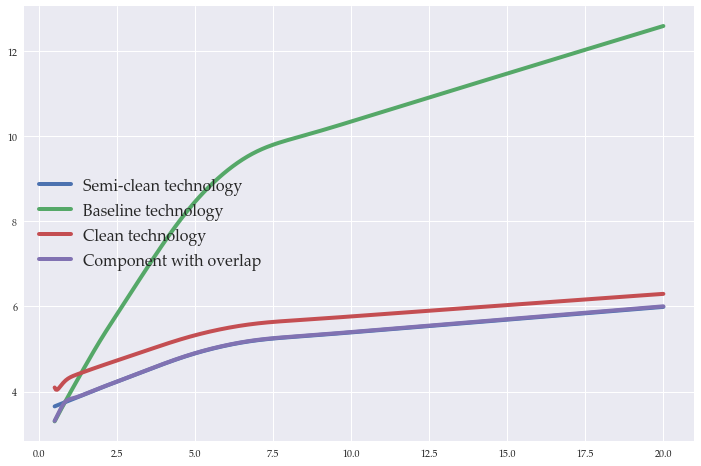

In [12]:
if catalog == "main_catalog":
    fig = plt.figure(figsize=(12, 8))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    for i, col in enumerate(["PwThat_U_ID_t1_2", "PwThat_U0_ID_C_EH_2", "PwThat_U_ID_t2_1", "PwThat_C_EH_2"]):
        assert col in df.columns
        ax.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[i])
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, fontsize=16, loc="center left")
    del fig, ax

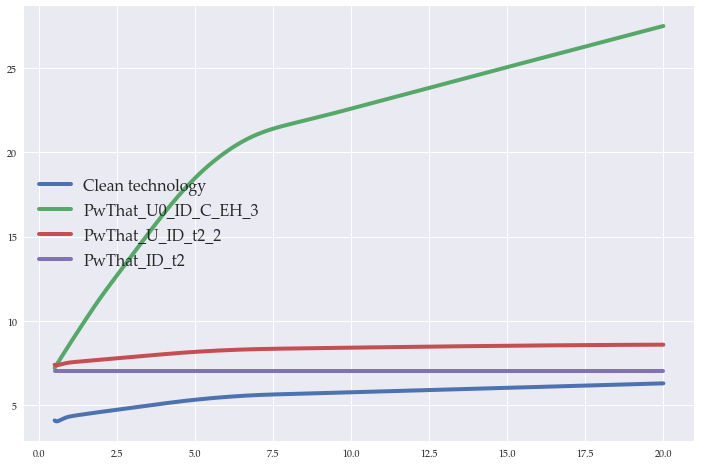

In [13]:
if catalog == "main_catalog":
    fig = plt.figure(figsize=(12, 8))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    for i, col in enumerate(["PwThat_U_ID_t2_1", "PwThat_U0_ID_C_EH_3", "PwThat_U_ID_t2_2", "PwThat_ID_t2"]):
        assert col in df.columns
        ax.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[i])
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, fontsize=16, loc="center left")
    del fig, ax

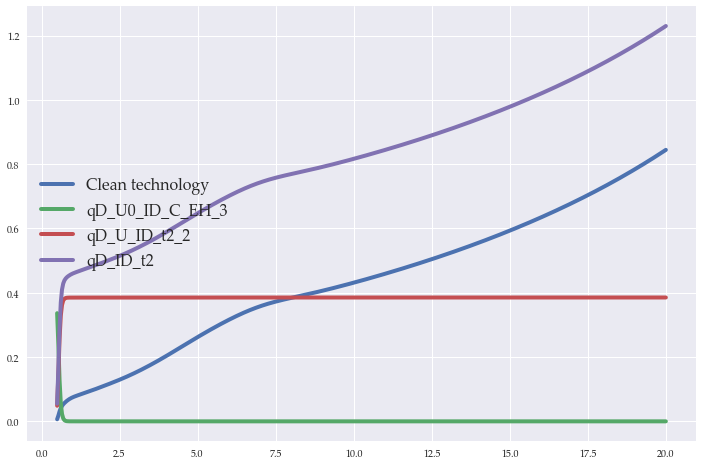

In [14]:
if catalog == "main_catalog":
    fig = plt.figure(figsize=(12, 8))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    for i, col in enumerate(["qD_U_ID_t2_1", "qD_U0_ID_C_EH_3", "qD_U_ID_t2_2", "qD_ID_t2"]):
        assert col in df.columns
        ax.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[i])
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, fontsize=16, loc="center left")

In [28]:
if catalog in ["categoryexperiment_ID", "categoryexperiment_EOP"]:
    fig = plt.figure(figsize=(12, 8))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    if "ID" in catalog:
        cols = ["qD_C_EH_2", "qD_U0_ID_C_EH_2", "qD_U_ID_t1_1"]
    elif "EOP" in catalog:
        cols = "YO"
    for i, col in enumerate(cols):
        assert col in df.columns
        ax.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[i])
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, fontsize=16, loc="center", bbox_to_anchor=(0.5, -0.25))
    format_single_axis(ax, "Price of emissions", "Input-displacing technology")
    del fig, ax